### Import Required Libraries

In [171]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### function to create simple graph identifying commenter across multiple videos

In [172]:
def SimpleNxGraph(comments_df, channel, graph_title):

    #identify if commenter are identified as channel_id_text or Commenter 
    if "Commenter"  in comments_df.columns: 
        com_var = 'Commenter'
    else:
        com_var = 'channel_id_text'

    # Filter for the current channel
    channel_checker = comments_df['channel_id'] == channel
    current_channeldf = comments_df[channel_checker]
    current_channeldf.reset_index(inplace=True)
    videos = current_channeldf['video_id'].unique()

    #create a commenter dict for commenters to be stored in
    commenterdict = {}

    G = nx.DiGraph()

    # Iterate over videos to add video nodes
    for v in videos:
        video_checker = current_channeldf['video_id'] == v
        current_chan_vid_df = current_channeldf[video_checker]

        # Count commenters
        for commenter in current_chan_vid_df[com_var]:
            commenterdict[commenter] = commenterdict.get(commenter, 0) + 1

        # Add nodes for the videos, using the first date for the label
        video_date = current_chan_vid_df['date'].iloc[0]  # Get the first date for the video
        G.add_node(v, label=video_date[0:11])

    # Iterate over comments to create edges
    for row_index in range(len(current_channeldf)):
        channel_id = current_channeldf[com_var][row_index]
        weight = commenterdict[channel_id]

        # Add channel node if it doesn't exist
        if channel_id not in G:
            G.add_node(channel_id)

        # Create an edge from commenters to videos
        video_id = current_channeldf['video_id'][row_index]
        G.add_edge(channel_id, video_id, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes

    # Draw nodes and edges
    commenter_handle = nx.draw_networkx_nodes(G, pos, nodelist=commenterdict.keys(), node_color="tab:blue", label='Commenters')
    video_handle = nx.draw_networkx_nodes(G, pos, nodelist=videos, node_color="tab:red", label='Videos')
    nx.draw_networkx_edges(G, pos)

    # Draw labels for video nodes
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Show plot
    plt.title(graph_title)
    plt.legend(loc='upper right')
    plt.show()



### change the number in channel_list to change relevant youtuber

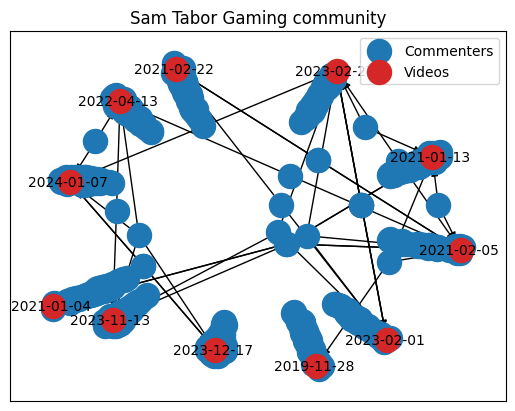

In [173]:
# Load data
comments = pd.read_csv("youtube_comments.csv")
channel_list = comments['channel_id'].unique()

#pick channel
channel = channel_list[4]
SimpleNxGraph(comments, channel, "Sam Tabor Gaming community")

In [174]:
channel

'UCWp3_e0cQvBHVpb_pTge5FQ'

### Examples of Active and Inactive Networks

Active

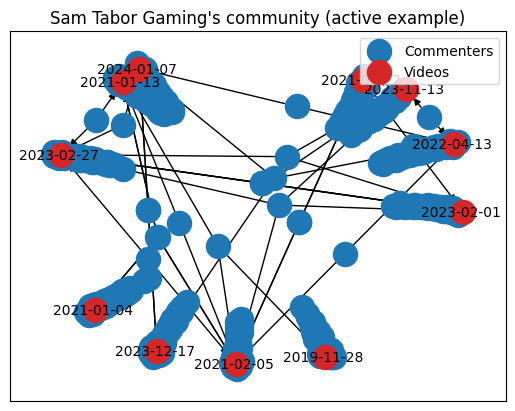

In [199]:
#UCWp3_e0cQvBHVpb_pTge5FQ
SimpleNxGraph(comments, 'UCWp3_e0cQvBHVpb_pTge5FQ', "Sam Tabor Gaming's community (active example)")

Inactive

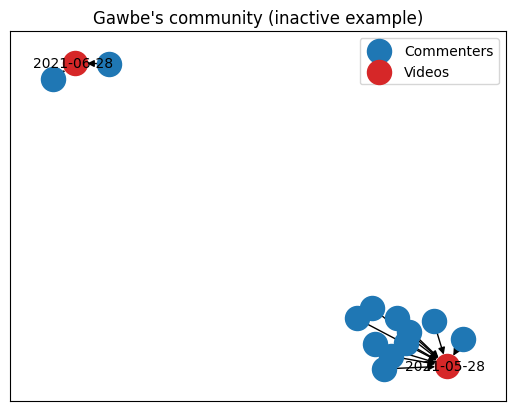

In [198]:
SimpleNxGraph(comments, 'UCyKgvo9mQXftAVor2G7_DrQ', "Gawbe's community (inactive example)")

#### exporing selected Channels

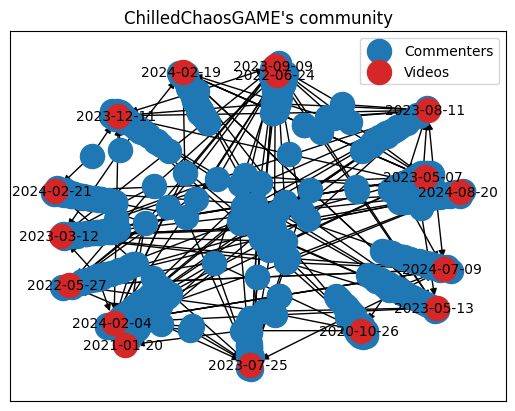

In [175]:
SimpleNxGraph(comments, 'UCpmu4uEZ8XcPjHdHh7_zFOg', "ChilledChaosGAME's community")

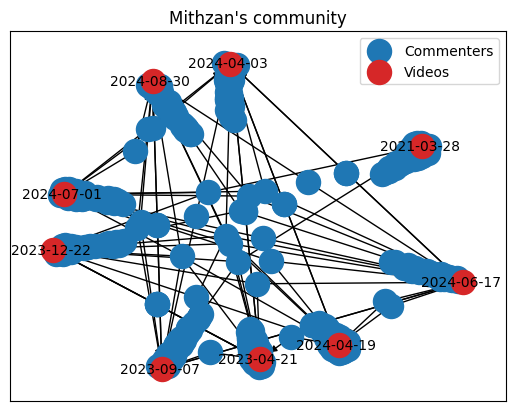

In [201]:
#UC7_YxT-KID8kRbqZo7MyscQ
SimpleNxGraph(comments, 'UCKajXDl2vPA3qUoJvBlfFaw', "Mithzan's community")

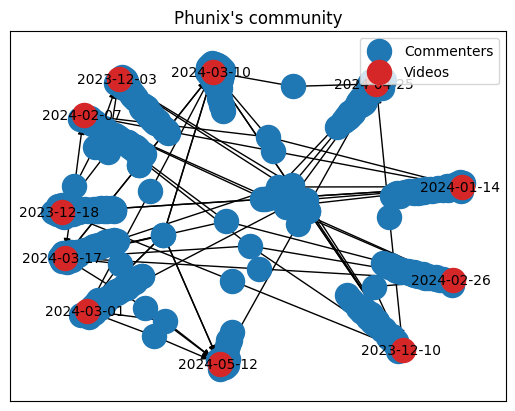

In [202]:
#UCS5Oz6CHmeoF7vSad0qqXfw
SimpleNxGraph(comments, 'UCmBukl4KYer7CbmFt8cMySg', "Phunix's community")

## Youtuber Critera Checker

In [197]:
#average Comment Counter 

vids_df = pd.read_csv('youtube_videos.csv')
reduced_vids = vids_df['Video ID']

biggerCommunities={}

#for every channel identify each unique video
for c in channel_list:

    channel_checker = comments['channel_id'] == c
    current_channeldf = comments[channel_checker]
    videos = current_channeldf['video_id'].unique()
    
    commenterdict = {}
    
    #get rows that are only relevant to the particular channel 
    for v in videos:
        video_checker = current_channeldf['video_id'] == v

        #add each commenter to commenterdict and if they are already in it increase their count by 1
        current_chan_vid_df = current_channeldf[video_checker]
        for commenter in current_chan_vid_df['channel_id_text']:
            if commenter not in commenterdict.keys():
                commenterdict[commenter] = 1
            else:
                commenterdict[commenter] = commenterdict[commenter] + 1
    
        vid_c = (vids_df['Video ID'] == v)
        current_vid = vids_df[vid_c]
        #print(current_vid['Subscribers'])
    
    #check each channel against 3 tests
    if sum(commenterdict.values()) > (len(commenterdict)+60):

        #check that on average users comment on 1.1 videos
        if (sum(commenterdict.values()))/len(commenterdict) > 1.1:

            #Check to see if videos viewership is 5% of their subscriber count and ensure subscribers are less than a million
            if (bool(float(current_vid['Subscribers'])/20 < float(current_vid['Views'])) and bool(int(current_vid['Subscribers']) < 1000000)):

                #display the number of comments and average comment per viewer
                biggerCommunities[c] = [current_vid['Channel Name'],  (sum(commenterdict.values()))/len(commenterdict)]

biggerCommunities
#current_vid sum(commenterdict.values()),
#,  (sum(commenterdict.values()))/len(commenterdict)
biggerCommunities.values()

C:\Users\afvm3\AppData\Local\Temp\ipykernel_15708\1041343007.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if (bool(float(current_vid['Subscribers'])/20 < float(current_vid['Views'])) and bool(int(current_vid['Subscribers']) < 1000000)):
C:\Users\afvm3\AppData\Local\Temp\ipykernel_15708\1041343007.py:37: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if (bool(float(current_vid['Subscribers'])/20 < float(current_vid['Views'])) and bool(int(current_vid['Subscribers']) < 1000000)):


dict_values([[1642    ChilledChaosGAME
Name: Channel Name, dtype: object, 1.209726443768997], [248    Maze
Name: Channel Name, dtype: object, 1.8026315789473684], [348    Boltrix
Name: Channel Name, dtype: object, 1.3823088455772115], [1621    Mithzan
Name: Channel Name, dtype: object, 1.187335092348285], [588    Phunix
Name: Channel Name, dtype: object, 1.1519823788546255], [1684    CapyRap62
Name: Channel Name, dtype: object, 1.5772357723577235], [1688    Ruki SAR
Name: Channel Name, dtype: object, 1.6923076923076923]])

In [185]:
biggerCommunities

{'UCpmu4uEZ8XcPjHdHh7_zFOg': [1642    ChilledChaosGAME
  Name: Channel Name, dtype: object,
  796,
  1.209726443768997],
 'UCR00GHnjTmZssgE3VfRAOgw': [248    Maze
  Name: Channel Name, dtype: object,
  137,
  1.8026315789473684],
 'UClGJXPEYFjjhsvPN0WgBD-A': [348    Boltrix
  Name: Channel Name, dtype: object,
  1844,
  1.3823088455772115],
 'UCKajXDl2vPA3qUoJvBlfFaw': [1621    Mithzan
  Name: Channel Name, dtype: object,
  450,
  1.187335092348285],
 'UCmBukl4KYer7CbmFt8cMySg': [588    Phunix
  Name: Channel Name, dtype: object,
  523,
  1.1519823788546255],
 'UCdIFllWI-S5WztgpWE6Q8uA': [1684    CapyRap62
  Name: Channel Name, dtype: object,
  194,
  1.5772357723577235],
 'UCBTapjlXkMTwGBLuo5qHLrg': [1688    Ruki SAR
  Name: Channel Name, dtype: object,
  154,
  1.6923076923076923]}

#### Graph CTC of the 6 youtubers who pass the 

<function matplotlib.pyplot.show(close=None, block=None)>

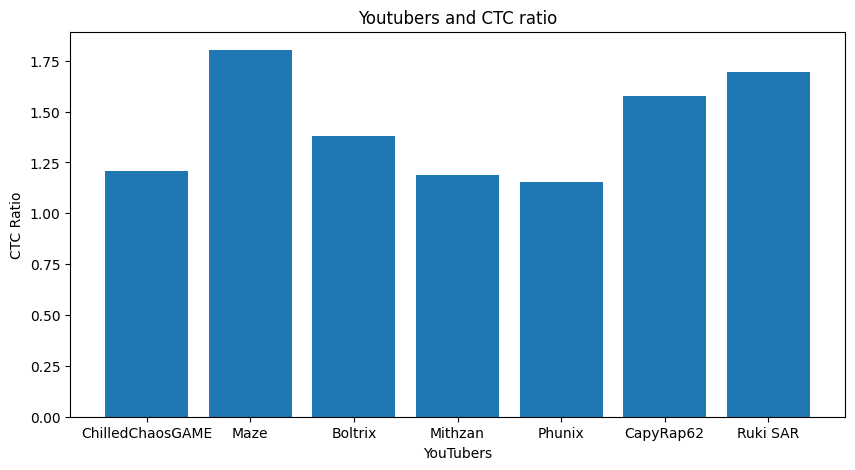

In [240]:
gNames = []
com2comter = []

for k in biggerCommunities.keys(): 
    current_list = biggerCommunities[k]
    gNames.append(current_list[0])
    com2comter.append(current_list[-1])

for g_index in range(len(gNames)):
    g = gNames[g_index]
    gNames[g_index] = (((str(g))[7:-34]).strip())

fig = plt.figure(figsize = (10, 5))
plt.bar(gNames, com2comter)
plt.title("Youtubers and CTC ratio")
plt.xlabel("YouTubers")
plt.ylabel("CTC Ratio")
plt.show


### Count the Number of Games on Each channel

In [190]:
game_list = pd.read_csv('GamesList.csv')

#games_count = {}

for k in biggerCommunities.keys(): 
    print(k)

    games_in_vid = []

    current_check = (comments['channel_id'] == k)
    cur_comments = comments[current_check]

    uniqueVids = cur_comments['video_id'].unique()

    cur_comments.reset_index(inplace=True)
    cur_comments
    for uv in uniqueVids:

        for com in cur_comments['text']:
            com = com.lower()

            for g in game_list['title']:
                g = g.lower()

                if g in com:
                    if g not in games_in_vid: 
                        games_in_vid.append(g)

    print(games_in_vid)
                    

#comments
#channel_list = comments['channel_id'].unique()
#game_list


UCpmu4uEZ8XcPjHdHh7_zFOg
['project winter', 'shellshock live']
UCR00GHnjTmZssgE3VfRAOgw
['wobbly life']
UClGJXPEYFjjhsvPN0WgBD-A
['bloons td battles 2']
UCKajXDl2vPA3qUoJvBlfFaw
['pico park', 'goose goose duck', 'crab game', 'project winter']
UCmBukl4KYer7CbmFt8cMySg
['bopl battle', 'shellshock live']
UCdIFllWI-S5WztgpWE6Q8uA
['super animal royale']
UCBTapjlXkMTwGBLuo5qHLrg
['super animal royale']


### Create a Dict with all ctc values for general Exploration

In [248]:
#vids_df = pd.read_csv('youtube_videos.csv')
reduced_vids = vids_df['Video ID']

Communities={}

for c in channel_list:

    channel_checker = comments['channel_id'] == c
    current_channeldf = comments[channel_checker]
    videos = current_channeldf['video_id'].unique()
    
    commenterdict = {}
    
    for v in videos:
        video_checker = current_channeldf['video_id'] == v
    
        current_chan_vid_df = current_channeldf[video_checker]
        for commenter in current_chan_vid_df['channel_id_text']:
            if commenter not in commenterdict.keys():
                commenterdict[commenter] = 1
            else:
                commenterdict[commenter] = commenterdict[commenter] + 1
    
        vid_c = (vids_df['Video ID'] == v)
        current_vid = vids_df[vid_c]
        #print(current_vid['Subscribers'])
    
        c_chan = current_vid['Channel Name']
        
        ctc_val = (sum(commenterdict.values()))/len(commenterdict)

        #display the number of comments and average comment per viewer
        Communities[(((str(c_chan))[4:-34]).strip())] = [ctc_val]

Order the dictionary

In [261]:
sortedComs = dict(sorted(Communities.items(), key=lambda item: item[1], reverse=True))
sortedComs

{'META Publishing': [3.0],
 'Louay Khemiri': [2.0408163265306123],
 'Maze': [1.8026315789473684],
 'Ruki SAR': [1.6923076923076923],
 'JUEST PK': [1.6],
 'Duke Movies': [1.6],
 'CapyRap62': [1.5772357723577235],
 'KinGmod': [1.565217391304348],
 'C Petti': [1.5555555555555556],
 'xenomancer': [1.5],
 'CaptureRapture': [1.5],
 'M Arslan Gamerz': [1.4705882352941178],
 'Boltrix': [1.3823088455772115],
 'TheBrokenMachine': [1.375],
 'Saxu': [1.3513513513513513],
 'OVER SHOW': [1.3513513513513513],
 'G1deon': [1.3478260869565217],
 'UMUSTPLAY': [1.3333333333333333],
 'Jonsandman Plays': [1.3333333333333333],
 'Ryan Mehalic': [1.2912621359223302],
 'smots🐟': [1.2857142857142858],
 "Doctor O'lolo": [1.2857142857142858],
 'The Yellow Carp': [1.2838709677419355],
 'EpicVG': [1.2820512820512822],
 'Bubbles': [1.28],
 'Gara Plays': [1.2727272727272727],
 'ZackApple427': [1.25],
 'Inspirer Games': [1.25],
 'TEKENDO JUEGA': [1.25],
 'Scribblenauts Guide': [1.25],
 'Ryu 5K': [1.25],
 'Nerd Psycho':